In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

In [2]:
filename = './videos/news.mpg'

In [3]:
def get_metrics(file, difference, params, dtype='int16'):
    cap = cv.VideoCapture(file)

    metrics = []

    ret, frame = cap.read()
    old_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY).astype(dtype)

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY).astype(dtype)
            metrics.append(difference(gray_frame, old_frame, params))
            old_frame = gray_frame
        else:
            cap.release()
            break

    return metrics


In [4]:
def diff_pixels(frameA, frameB, params):
    diff = np.abs(frameA - frameB)
    return np.where(diff > params[0], 1, 0).sum()


In [5]:
def diff_blocks(frameA, frameB, params):
    diff = np.abs(frameA - frameB)
    diff = diff * diff

    count = 0
    for row in range(0, frameA.shape[0], params[0]):
        for col in range(0, frameA.shape[1], params[0]):
            root = np.sqrt(diff[row:row+params[0], col:col+params[0]].sum())
            if root > params[1]:
                count += 1

    return count


In [6]:
def save_metrics(file, output, metrics):
    cap = cv.VideoCapture(file)

    width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    
    fourcc = cv.VideoWriter_fourcc(*'DIVX')
    out = cv.VideoWriter(output, fourcc, 20.0, (width,  height))

    count = 0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            if count < len(metrics) and metrics[count]:
                out.write(frame)
        else:
            cap.release()
            out.release()
            break
        count += 1


[mpeg1video @ 0x564e57542d80] ac-tex damaged at 0 10
[mpeg1video @ 0x564e57542d80] Warning MVs not available


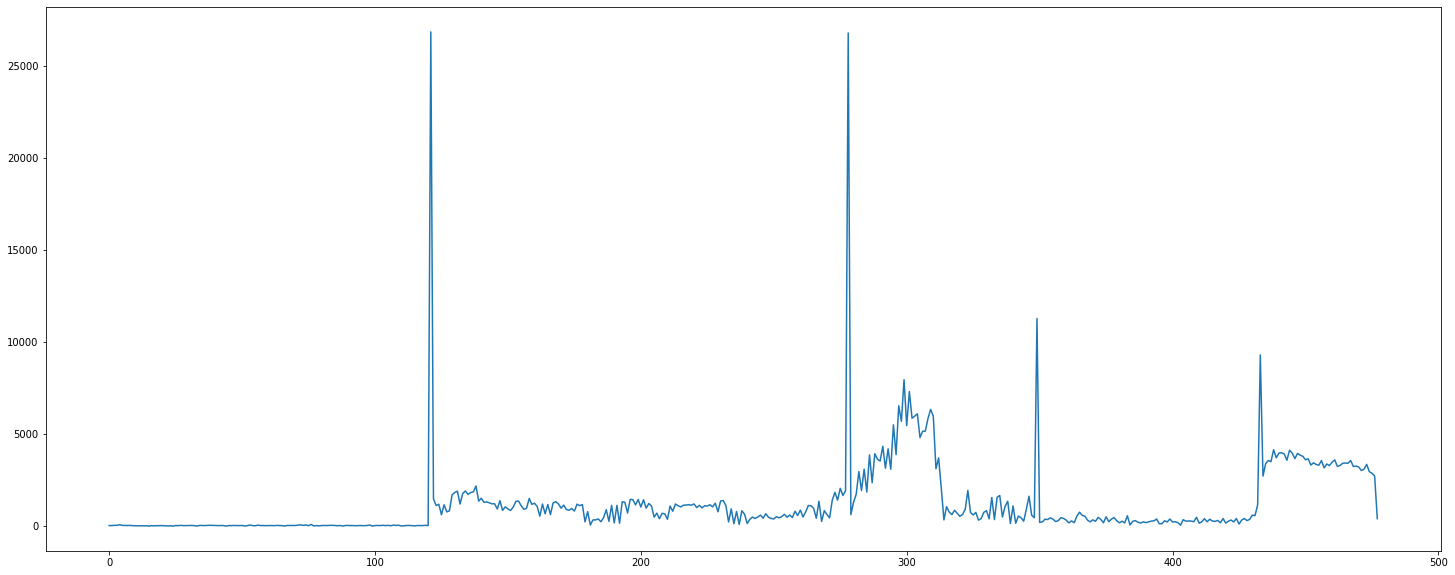

In [7]:
Y = np.array(get_metrics(filename, diff_pixels, [128]))
X = range(len(Y))

plt.figure(figsize=(25,10))
plt.plot(X, Y)

In [8]:
output_name = '{}_pixels.mp4'.format(filename.rsplit('.', 1)[0])
save_metrics(filename, output_name, Y > 3000)

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
[mpeg1video @ 0x564e5761b200] ac-tex damaged at 0 10
[mpeg1video @ 0x564e5761b200] Warning MVs not available


[mpeg1video @ 0x564e57625c40] ac-tex damaged at 0 10
[mpeg1video @ 0x564e57625c40] Warning MVs not available


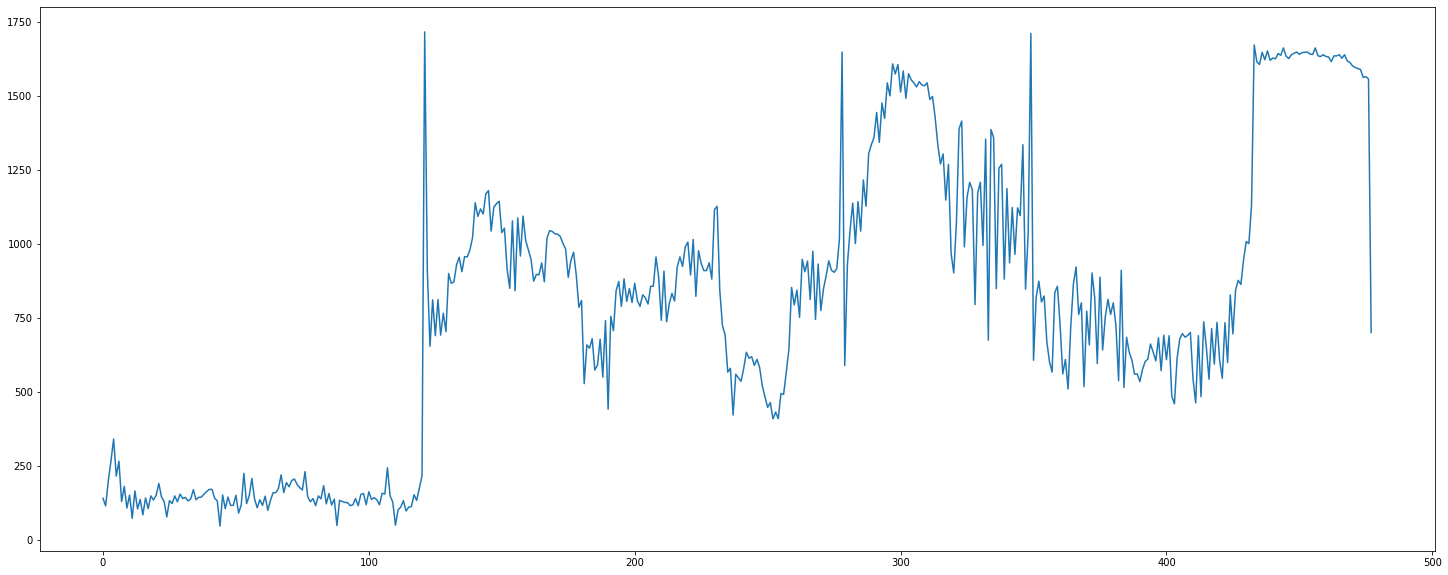

In [9]:
Y = np.array(get_metrics(filename, diff_blocks, [8, 128], 'int32'))
X = range(len(Y))

plt.figure(figsize=(25,10))
plt.plot(X, Y)

In [10]:
output_name = '{}_blocks.avi'.format(filename.rsplit('.', 1)[0])
save_metrics(filename, output_name, Y > 3000)

[mpeg1video @ 0x564e576df7c0] ac-tex damaged at 0 10
[mpeg1video @ 0x564e576df7c0] Warning MVs not available
